<a href="https://colab.research.google.com/github/CS23M005/Assignment2_PartA/blob/main/CS23M005_A2_PartA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import math

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [2]:
device

device(type='cuda')

In [2]:
!wget https://storage.googleapis.com/wandb_datasets/nature_12K.zip -O nature_12K.zip
!unzip -q nature_12K.zip

--2024-04-08 16:49:30--  https://storage.googleapis.com/wandb_datasets/nature_12K.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.219.207, 209.85.146.207, 209.85.147.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.219.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3816687935 (3.6G) [application/zip]
Saving to: 'nature_12K.zip'

nature_12K.zip      100%[===================>]   3.55G   167MB/s    in 19s     

2024-04-08 16:49:50 (187 MB/s) - 'nature_12K.zip' saved [3816687935/3816687935]



In [3]:
!rm nature_12K.zip

In [4]:
from torchvision.datasets import ImageFolder
import torchvision.transforms as transforms
from torch.utils.data import Subset, DataLoader
import torchvision
from torch import optim
from tqdm import tqdm
from torch.utils.data import DataLoader
from torchvision import datasets


In [5]:
class ConvNet(nn.Module):
    def __init__(self, input_channel, output_size, num_filters, filter_size, activation_fun, filter_config, 
                 stride, neurons, poolstride, poolsize, dropoutval, batchnorm):
        super(ConvNet,self).__init__()
        self.k = filter_size
        m = self.getM()
        self.s = stride
        w, h = 224,224

        self.conv1 = nn.Conv2d(input_channel, m[0], self.k, self.s)
        self.bn1 = nn.BatchNorm2d(m[0])
        w,h = self.getWH(w,h, self.k, self.s)
        self.pool1 = nn.MaxPool2d(poolsize,poolstride)
        w,h = self.getWH(w,h,poolsize,poolstride)
        self.conv2 = nn.Conv2d(m[0], m[1], self.k, self.s)
        self.bn2 = nn.BatchNorm2d(m[1])
        w,h = self.getWH(w,h, self.k, self.s)
        self.pool2 = nn.MaxPool2d(poolsize,poolstride)
        w,h = self.getWH(w,h,poolsize,poolstride)
        self.conv3 = nn.Conv2d(m[1], m[2], self.k, self.s)
        self.bn3 = nn.BatchNorm2d(m[2])
        w,h = self.getWH(w,h, self.k, self.s)
        self.pool3 = nn.MaxPool2d(poolsize,poolstride)
        w,h = self.getWH(w,h,poolsize,poolstride)
        self.conv4 = nn.Conv2d(m[2], m[3], self.k, self.s)
        self.bn4 = nn.BatchNorm2d(m[3])
        w,h = self.getWH(w,h, self.k, self.s)
        self.pool4 = nn.MaxPool2d(poolsize,poolstride)
        w,h = self.getWH(w,h,poolsize,poolstride)
        self.conv5 = nn.Conv2d(m[3], m[4], self.k, self.s)
        self.bn5 = nn.BatchNorm2d(m[4])
        w,h = self.getWH(w,h, self.k, self.s)
        self.pool5 = nn.MaxPool2d(poolsize,poolstride)
        w,h = self.getWH(w,h,poolsize,poolstride)
        self.dropout = nn.Dropout(dropoutval)
        self.fc1 = nn.Linear(m[4]*w*h, neurons)
        self.fc2 = nn.Linear(neurons,10)
       



    def getWH(self, w, h, f, s):
      return (math.floor(((w-f)/s)+1),math.floor(((w-f)/s)+1))

    def getM(self):
        m = []
        if(filter_config == "double"):
          for i in range(1,6):
            m.append((int)(2**(i)*num_filters))
        elif(filter_config == "same"):
          for i in range(1,6):
            m.append(int(num_filters))
        elif(filter_config == "half"):
          for i in range(1,6):
            m.append((int)(num_filters/(2**(i))))
        return m

    def getActivation_fn(self):
        if(activation_fun == "relu"):
            activation_fn = F.relu
        elif(activation_fun == "gelu"):
            activation_fn = F.gelu
        elif(activation_fun == "silu"):
            activation_fn = F.silu
        elif(activation_fun=="mish"):
            activation_fn = F.mish
        return activation_fn
    
    def getbn(self):
        return batchnorm

    def forward(self, x):
        activation_fn = self.getActivation_fn()
        batchnorm = self.getbn()
        x = self.conv1(x)
        if(batchnorm == "yes"):
            x = self.bn1(x)
        x = activation_fn(x)
        x = self.pool1(x)
        x = self.conv2(x)
        if(batchnorm == "yes"):
            x = self.bn2(x)
        x = activation_fn(x)
        x = self.pool2(x)
        x = self.conv3(x)
        if(batchnorm == "yes"):
            x = self.bn3(x)
        x = activation_fn(x)
        x = self.pool3(x)
        x = self.conv4(x)
        if(batchnorm == "yes"):
            x = self.bn4(x)
        x = activation_fn(x)
        x = self.pool4(x)
        x = self.conv5(x)
        if(batchnorm == "yes"):
            x = self.bn5(x)
        x = activation_fn(x)
        x = self.pool5(x)
        x = self.dropout(x)
        x = x.reshape(x.shape[0], -1)
        x = activation_fn(self.fc1(x))
        x = self.fc2(x)
        return x



In [8]:

# mode = ConvNet(input_channel, output_size, num_filters, filter_size, activation_fun, filter_config, 
#                  stride, neurons, poolstride, poolsize, dropoutval, batchnorm)

In [6]:
# Below function takes the optimizer string as input and outputs the model optimizer
def getOptim(model,optim_name, learning_rate):
  if(optim_name == 'sgd'):
    optimizer = optim.SGD(model.parameters(), lr=learning_rate)
  elif(optim_name == 'adam'):
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
  else:
    optimizer = optim.NAdam(model.parameters(), lr=learning_rate)
  return optimizer


In [7]:
# this function takes the data and do forward propagation and generates the accuracy and loss
def check_accuracy(loader,model,criterion,batchSize):
    num_correct = 0
    num_loss = 0
    total = 0
    num_samples = 0
    total_loss = 0.0
    model.eval()
    with torch.no_grad():
        for x, y in loader:
            x = x.to(device=device)
            y = y.to(device=device)
            scores = model(x) 
            loss = criterion(scores, y)
            total_loss += loss.item()*batchSize
            _, predictions = scores.max(1)
            num_correct += (predictions == y).sum().item()
            num_samples += predictions.size(0)
    model.train()
    return (num_correct / num_samples)*100 , total_loss

In [52]:
    #Below code reads the dataset and transforms (2 types - with augmentation and without augmentation)
    
    #without augmentation
    transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,),(0.5,))])

    train_dataset = datasets.ImageFolder(root='inaturalist_12K/train',transform=transform)

    train_dataset,val_dataset = torch.utils.data.random_split(train_dataset,[8000,1999])
    
    #with augmentation
    transform2 = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,),(0.5,))])

    train_dataset2 = datasets.ImageFolder(root='inaturalist_12K/train',transform=transform2)

    train_dataset2,val_dataset2 = torch.utils.data.random_split(train_dataset2,[8000,1999])
    
    #function takes input augmentation string and produces required transformed data loader
    def getData(data_aug, batchSize):
        if(data_aug == "no"):
            train_loader = torch.utils.data.DataLoader(train_dataset,batch_size =batchSize,shuffle = True,num_workers=2,pin_memory=True)
            val_loader = torch.utils.data.DataLoader(val_dataset,batch_size =batchSize,shuffle = True,num_workers=2,pin_memory=True)
        else:
            train_loader = torch.utils.data.DataLoader(train_dataset2,batch_size =batchSize,shuffle = True,num_workers=2,pin_memory=True)
            val_loader = torch.utils.data.DataLoader(val_dataset2,batch_size =batchSize,shuffle = True,num_workers=2,pin_memory=True)
        return train_loader, val_loader

In [45]:
def train_cnn(input_channel, output_size, num_filters, filter_size, activation_fun, filter_config,
              stride, neurons,optim_name,batchSize,dropOut,num_epochs,learning_rate, poolstride, poolsize, data_aug, batchnorm):

    train_loader, val_loader = getData(data_aug, batchSize)
    model = ConvNet(input_channel, output_size, num_filters, filter_size, activation_fun, filter_config, 
                    stride, neurons, poolstride, poolsize, dropOut, batchnorm).to(device)
    optimizer = getOptim(model,optim_name, learning_rate)
    criterion = nn.CrossEntropyLoss()

    for epoch in range(num_epochs):
        for batch_idx, (data, targets) in enumerate(tqdm(train_loader)):
            data = data.to(device=device)
            targets = targets.to(device=device)
            scores = model(data)
            loss = criterion(scores,targets)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
#         train_accuracy,train_loss = check_accuracy(train_loader, model,criterion,batchSize)
#         validation_accuracy,validation_loss = check_accuracy(val_loader, model,criterion,batchSize)
#         print(f"train_accuracy:{train_accuracy:.4f},train_loss:{train_loss:.4f}")
#         print(f"validation_accuracy:{validation_accuracy:.4f},validation_loss:{validation_loss:.4f}")
#         wandb.log({'train_accuracy':train_accuracy})
#         wandb.log({'train_loss':train_loss})
#         wandb.log({'val_accuracy':validation_accuracy})
#         wandb.log({'val_loss':validation_loss})
    test_dataset = datasets.ImageFolder(root='inaturalist_12K/val',transform=transform)
    test_loader = torch.utils.data.DataLoader(test_dataset,batch_size =batchSize,shuffle = True,num_workers=2,pin_memory=True)     
    class_labels=test_dataset.classes
    test_accuracy,test_loss = check_accuracy(test_loader, model,criterion,batchSize)
    image_print(test_loader, model,criterion,batchSize, class_labels)
    


In [10]:
!pip install wandb
import wandb
wandb.login()

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

  ········································


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [53]:

def image_print(loader, model,criterion,batchSize, class_labels):
    fig = plt.figure(figsize = (15,30))
    cnt = 0
    model.eval()
    with torch.no_grad():
        for x, y in loader:
            if(cnt>29):
                break
            x1 = x.to(device=device)
            y = y.to(device=device)
            scores = model(x1)
            _, predictions = scores.max(1)
            ax = fig.add_subplot(10,3,cnt+1)
            ax.set_xticks([])
            ax.set_yticks([])
            ax.set_title(f'True: {class_labels[y[0].item()]},\npredicted {class_labels[predictions[0].item()]}', size=10)
            ax.imshow(x[0].permute(1,2,0))
            cnt += 1
        plt.savefig('abc.jpg')
        plt.show()

100%|██████████| 125/125 [00:45<00:00,  2.75it/s]


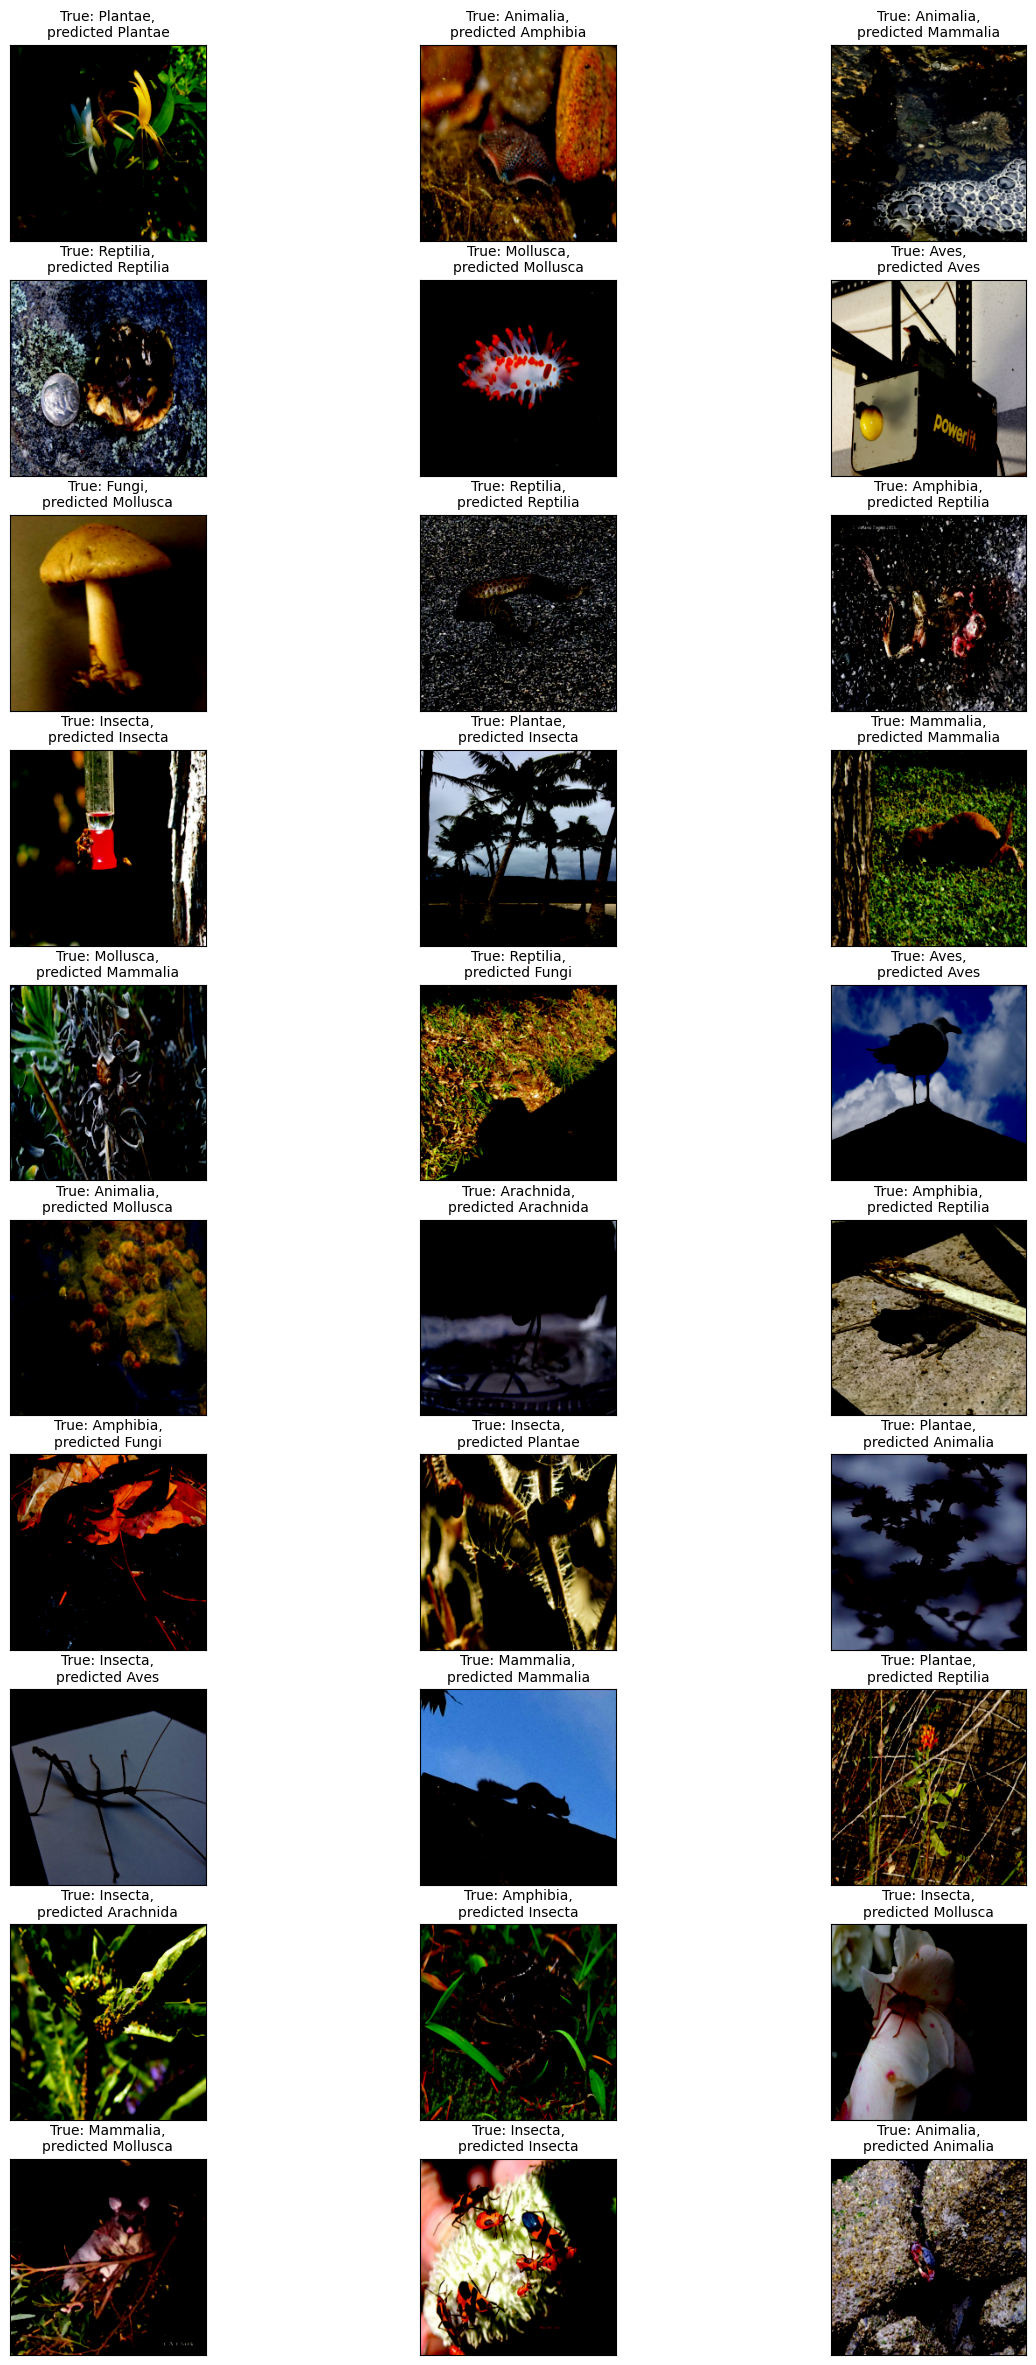

In [54]:
# optim_name = 'adam'
# batchSize=64
# dropOut = 0.1
# num_epochs = 5
# learning_rate = 1e-3
# input_channel=3
# output_size=10
# num_filters=32
# filter_size=3
# activation_fun = "mish"
# filter_config = "same"
# stride = 1
# neurons = 32
# poolstride = 2
# poolsize = 2
# dropoutval = 0.2
# batchnorm = "no"
# data_aug = "no"
# train_cnn(input_channel, output_size, num_filters, filter_size, activation_fun, filter_config,
#                stride, neurons,optim_name,batchSize,dropOut,num_epochs,learning_rate, poolstride, poolsize, data_aug, batchnorm)


In [32]:
import argparse

def parse_args():
    p = argparse.ArgumentParser(description = "provide optinal parameters for training")
    p.add_argument('-wp', '--wandb_project', type=str, default="Assignment2_PartA", help="wandb project name")
    p.add_argument('-nF', '--num_filters', type=int, default=32, choices = [16,32, 64], help="number of filters")
    p.add_argument('-sF', '--filter_size', type=int, default=3, choices = [3, 5, 7], help="filter size")
    p.add_argument('-aF', '--activation_fun', type=str, default="mish", choices = ['relu','gelu','silu','mish'], help="activation function")
    p.add_argument('-fC', '--filter_config', type=str, default="same", choices = ['same','double','half'], help="filter configuration")
    p.add_argument('-n', '--neurons', type=int, default=32, choices = [128, 256], help="dense layer neurons")
    p.add_argument('-opt', '--optim_name', type=str, default="nadam", choices = ['sgd','adam','nadam'], help="optimizer for backprop")
    p.add_argument('-bS', '--batchSize', type=int, default=32, choices = [32, 64], help="batch size")
    p.add_argument('-d', '--dropOut', type=float, default=0.2, choices = [0.2, 0.3], help="dropout rate")
    p.add_argument('-ag', '--data_aug', type=str, default="no", choices = ['yes', 'no'], help="data augmentation")
    p.add_argument('-bN', '--batchnorm', type=str, default="no", choices = ['yes', 'no'], help="batch normalization")
    p.add_argument('-nE', '--num_epochs', type=int, default=1, choices = [5, 10], help="number of epochs")
    p.add_argument('-lR', '--learning_rate', type=float, default=1e-3, choices = [1e-3, 1e-4], help="learning rate")
    return p.parse_args()
    
args = parse_args()

print(args.wandb_project)

wandb.init(project = args.wandb_project)
wandb.run.name=f'neurons {str(args.neurons)} filterSize {str(args.filter_size)} activFun {args.activation_fun}'

train_cnn(input_channel, output_size, args.num_filters, args.filter_size, args.activation_fun, args.filter_config,
               stride, args.neurons,args.optim_name,args.batchSize,args.dropOut,args.num_epochs,args.learning_rate, poolstride, poolsize, args.data_aug, args.batchnorm)
    
 
 wandb.finish()  

    
    
    
    
    
    
    

AttributeError: 'NoneType' object has no attribute 'wandb_project'

In [13]:
optim_name = 'adam'
batchSize=32
dropOut = 0.4
num_epochs = 1
learning_rate = 1e-3
input_channel=3
output_size=10
num_filters=16
filter_size=3
activation_fun = "relu"
filter_config = "same"
stride = 1
poolstride = 2
poolsize = 2

In [ ]:
def main_fun():
    wandb.init(project ='Assignment2_PartA')
    params = wandb.config
    with wandb.init(project = 'Assignment2_PartA', name='neurons'+str(params.neurons)+'filterSize'+str(params.filter_size)+'activFun'+params.activation_fun) as run:
        train_cnn(input_channel, output_size, params.num_filters, params.filter_size, params.activation_fun, params.filter_config,
              stride, params.neurons,params.optim_name, params.batchSize, params.dropOut, params.num_epochs, params.learning_rate, 
                  poolstride, poolsize, params.data_aug, params.batchnorm)

sweep_params = {
    'method' : 'bayes',
    'name'   : 'cs23m005',
    'metric' : {
        'goal' : 'maximize',
        'name' : 'val_accuracy',
    },
    'parameters' : {
        'neurons':{'values':[64,128,256]},
        'num_filters' : {'values' : [16,32,64]},
        'filter_size':{'values' : [3,5,7]},
        'activation_fun' :{'values':['relu','gelu','silu','mish']},
        'filter_config' : {'values':['same','double']},
        'optim_name' :{'values':['sgd','adam','nadam']},
        'batchSize' : {'values':[32,64]},
        'dropOut' :{'values':[0.2]},
        'data_aug' :{'values':['yes','no']},
        'batchnorm' :{'values':['yes','no']},
        'num_epochs':{'values':[5,10]},
        'learning_rate' :{'values':[1e-3,1e-4]}
    }
}
sweepId = wandb.sweep(sweep_params,project = 'Assignment2_PartA')
wandb.agent(sweepId,function =main_fun,count = 1)
wandb.finish()

Create sweep with ID: 4unsiajz
Sweep URL: https://wandb.ai/cs23m005/Assignment2_partA/sweeps/4unsiajz


wandb: Agent Starting Run: yacu0ei4 with config:
wandb: 	activation_fun: relu
wandb: 	batchSize: 32
wandb: 	batchnorm: yes
wandb: 	data_aug: no
wandb: 	dropOut: 0.2
wandb: 	filter_config: double
wandb: 	filter_size: 7
wandb: 	learning_rate: 0.0001
wandb: 	neurons: 128
wandb: 	num_epochs: 10
wandb: 	num_filters: 16
wandb: 	optim_name: nadam
wandb: Currently logged in as: cs23m005. Use `wandb login --relogin` to force relogin
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


wandb: WARNING Ignored wandb.init() arg project when running a sweep.


100%|██████████| 250/250 [00:52<00:00,  4.77it/s]


train_accuracy:18.0125,train_loss:17687.5683
validation_accuracy:18.3592,validation_loss:4459.6301


 68%|██████▊   | 170/250 [00:31<00:14,  5.57it/s]